<a href="https://colab.research.google.com/github/hejiang2/datacamp-courses/blob/master/Importing_and_Managing_Financial_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing financial data from the web

You can retrieve stock price data from IEX.

In [ ]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2019,1,1)
end = date(2019,12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'iex'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end, access_key='pk_406222e7948649909a25a9c8d7395e29')

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: the 'access_key'' keyword is deprecated, use 'api_key' instead


              open    high     low   close    volume
date                                                
2019-01-02  154.89  158.85  154.23  157.92  37039737
2019-01-03  143.98  145.72  142.00  142.19  91312195
2019-01-04  144.53  148.55  143.80  148.26  58607070
2019-01-07  148.70  148.83  145.90  147.93  54777764
2019-01-08  149.56  151.82  148.52  150.75  41025314
<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-01-02 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    252 non-null    float64
 1   high    252 non-null    float64
 2   low     252 non-null    float64
 3   close   252 non-null    float64
 4   volume  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


How to retrieve data from the Federal Reserve Economic Data (FRED) portal?

https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM

Let's visualize the Gold Fixing Price 10:30 AM (London time) in London Bullion Market, in US Dollars.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13670 entries, 1968-04-01 to 2020-08-21
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GOLDAMGBD228NLBM  13247 non-null  float64
dtypes: float64(1)
memory usage: 213.6 KB


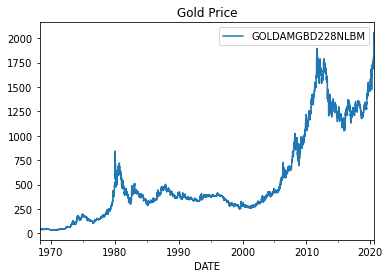

In [ ]:
import matplotlib.pyplot as plt

# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start date
start = date(1968,1,1)

# Set series code
series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title = 'Gold Price')

# Show the plot
plt.show()

Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

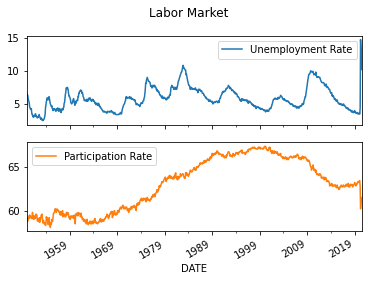

In [ ]:
# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title = 'Labor Market')

# Show the plot
plt.show()

Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Google Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.

For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, you'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.

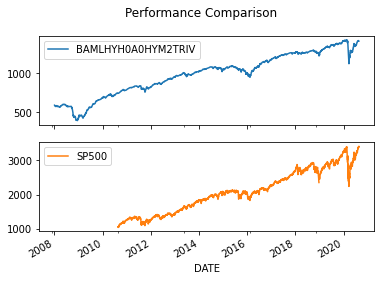

In [ ]:
# Set the start date
start = date(2008, 1, 1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots = True, title = 'Performance Comparison')

# Show the plot
plt.show()

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Importing%20and%20Managing%20Financial%20Data%20in%20Python/listings.xlsx'
listings = pd.read_excel(url, sheet_name='nyse', na_values='n/a')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


In [6]:
from pandas_datareader.data import DataReader
from datetime import date

# Set Stock Symbol as the index
listings_ss = listings.set_index('Stock Symbol')

# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector == 'Finance', 'Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.to_list()

# Set start date
start = date(2015,1,1)

# Set end date
end = date(2020,4,1)

# Import stock data
result = DataReader(top_3_tickers, 'iex', start, end, access_key='pk_406222e7948649909a25a9c8d7395e29')
result = result[~result.index.duplicated()]
data = pd.DataFrame()
for ticker in result.columns.levels[1]:
    index = pd.MultiIndex.from_arrays([
            [ticker] * len(result),
            result.index.values
            ], names=['ticker', 'date'])
    ticker_df = pd.DataFrame(index=index)
    for col in result.columns.levels[0]:
        ticker_df[col] = result[col][ticker].values
    data = pd.concat([data, ticker_df])

# Unstack and inspect result
data['close'].unstack().info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: the 'access_key'' keyword is deprecated, use 'api_key' instead


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, BAC to WFC
Columns: 1160 entries, 2015-08-24 to 2020-04-01
dtypes: float64(1160)
memory usage: 27.2+ KB


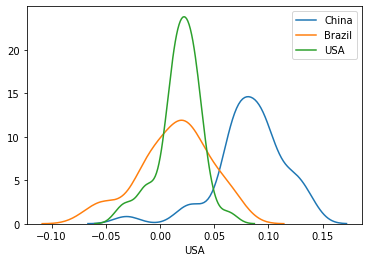

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the file into growth
growth = pd.read_csv('https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Importing%20and%20Managing%20Financial%20Data%20in%20Python/income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.show()